# Manpower Optimisation Labs
by Matara Gerald

## Hungarian Assignment Algorithm

The Hungarian Assignment Algorithm, also known as the Kuhn-Munkres algorithm, is a combinatorial optimization algorithm that solves the assignment problem in polynomial time. The assignment problem involves finding the optimal way to assign a set of workers to a set of tasks such that the total cost is minimized (or maximized, depending on the problem).

### Key Features:
- **Input**: A cost matrix where each element represents the cost of assigning a specific worker to a specific task.
- **Output**: An optimal assignment of workers to tasks that minimizes the total cost.
- **Applicability**: Works for both square (n x n) and rectangular (n x m) matrices. In rectangular cases, some workers or tasks may remain unassigned.

### Steps of the Algorithm:
1. Subtract the smallest value in each row from all elements of that row.
2. Subtract the smallest value in each column from all elements of that column.
3. Cover all zeros in the matrix using the minimum number of horizontal and vertical lines.
4. If the number of lines equals the size of the matrix, an optimal assignment is found. Otherwise, adjust the matrix and repeat.

### Advantages:
- Efficient for solving large-scale assignment problems.
- Guarantees an optimal solution.

### Applications:
- Task scheduling.
- Resource allocation.
- Matching problems in graph theory.

In [14]:
import numpy as np
from solver import load_cost_matrix_from_excel, solve_hungarian_assignment
from visualizer import visualize_cost_matrix, visualize_bipartite_graph


def test_hungarian_assignment_from_excel(file_path):
    """
    Test the Hungarian Assignment algorithm using both types of Excel files.
    This function generates the test files and runs the algorithm on them.
    """
    # Generate the test files
    # tabular_file_path, list_file_path = generate_test_excel_files()
    
    print("\n" + "="*50)
    print("TESTING HUNGARIAN ASSIGNMENT ALGORITHM")
    print("="*50)
    
    # Test with tabular format
    print("\nTEST 1: Tabular Format Excel File")
    print("-"*50)
    try:
        cost_matrix, workers, tasks = load_cost_matrix_from_excel(
            file_path,
            verbose=True
        )
        
        # Solve the assignment problem
        assignments, total_cost, worker_indices, task_indices = solve_hungarian_assignment(cost_matrix)
        
        print("\nAssignment Results:")
        print(f"Total cost: {total_cost}")
        
        # Create human-readable results
        print("\nHuman-readable assignments:")
        for worker_idx, task_idx in assignments:
            worker_name = workers[worker_idx]
            task_name = tasks[task_idx]
            cost = cost_matrix[worker_idx, task_idx]
            print(f"  {worker_name} -> {task_name} (Cost: {cost})")
            
        print("\nTest 1 completed successfully!")
        
    except Exception as e:
        print(f"Error in Test 1: {e}")
   
    # Generate visualizations
    try:
        # Visualize cost matrix as heatmap
        visualize_cost_matrix(cost_matrix, assignments, "Cost Matrix Heatmap")
        
        # Visualize as bipartite graph
        visualize_bipartite_graph(cost_matrix, assignments, workers, tasks, 
                                 "Worker-Task Assignment Network")
        
    except Exception as e:
        print(f"Error in visualization: {e}")



TESTING HUNGARIAN ASSIGNMENT ALGORITHM

TEST 1: Tabular Format Excel File
--------------------------------------------------
Successfully loaded Excel file from test_data.xlsx
Sheet: 0
DataFrame shape: (20, 21)
Processing in tabular format
Created cost matrix with shape: (20, 20)
Number of workers: 20
Number of tasks: 20
Input Cost Matrix (20 workers x 20 tasks):
[[1. 3. 1. 1. 1. 1. 1. 1. 2. 3. 1. 5. 3. 8. 9. 5. 2. 1. 3. 2.]
 [2. 3. 3. 4. 5. 4. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 1. 2. 4. 5. 3. 4. 5. 3. 4. 1. 1. 1. 1. 1. 3. 3. 4. 4. 3.]
 [1. 3. 1. 1. 1. 1. 1. 1. 2. 3. 1. 5. 3. 8. 9. 5. 2. 1. 3. 2.]
 [2. 3. 3. 4. 5. 4. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 3. 1. 1. 1. 1. 1. 1. 2. 3. 1. 5. 3. 8. 9. 5. 2. 1. 3. 2.]
 [2. 3. 3. 4. 5. 4. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 1. 2. 4. 5. 3. 4. 5. 3. 4. 1. 1. 1. 1. 1. 3. 3. 4. 4. 3.]
 [3. 1. 2. 4. 5. 3. 4. 5. 3. 4. 1. 1. 1. 1. 1. 3. 3. 4. 4. 3.]
 [1. 3. 1. 1. 1. 1. 1. 1. 2. 3. 1. 5. 3. 8. 9. 5. 2. 1. 3. 2.]
 [2

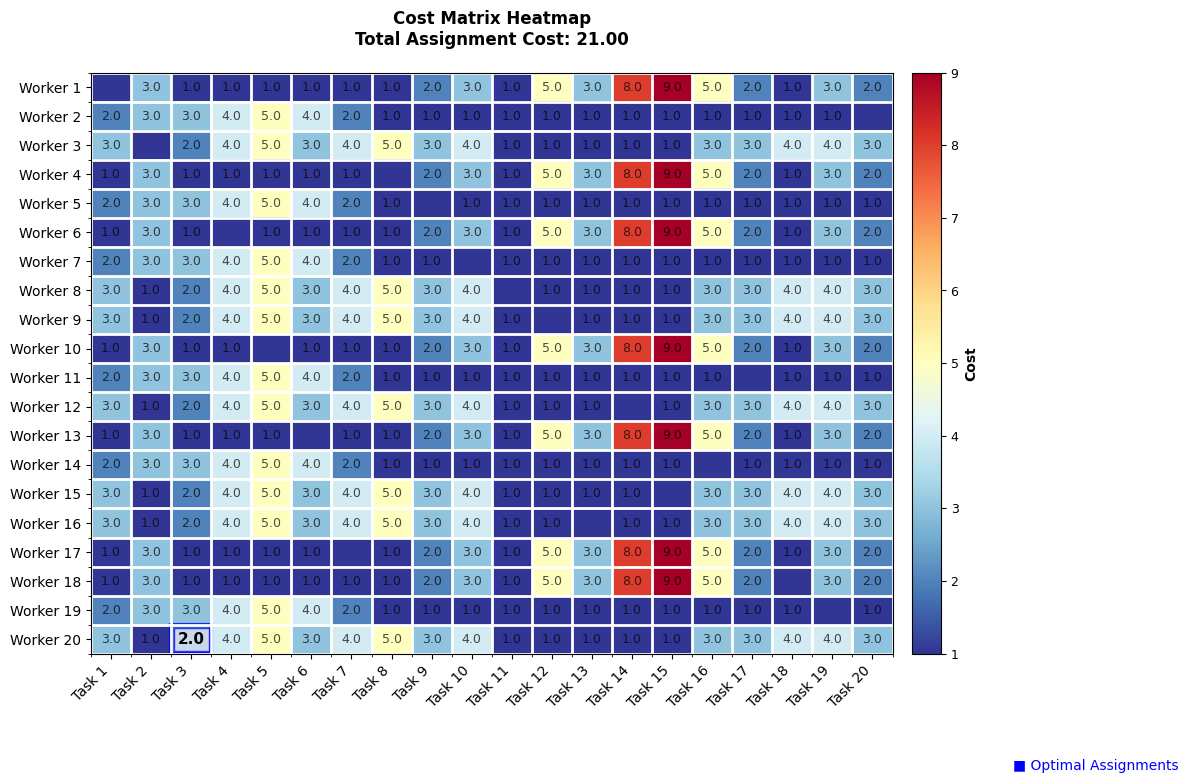

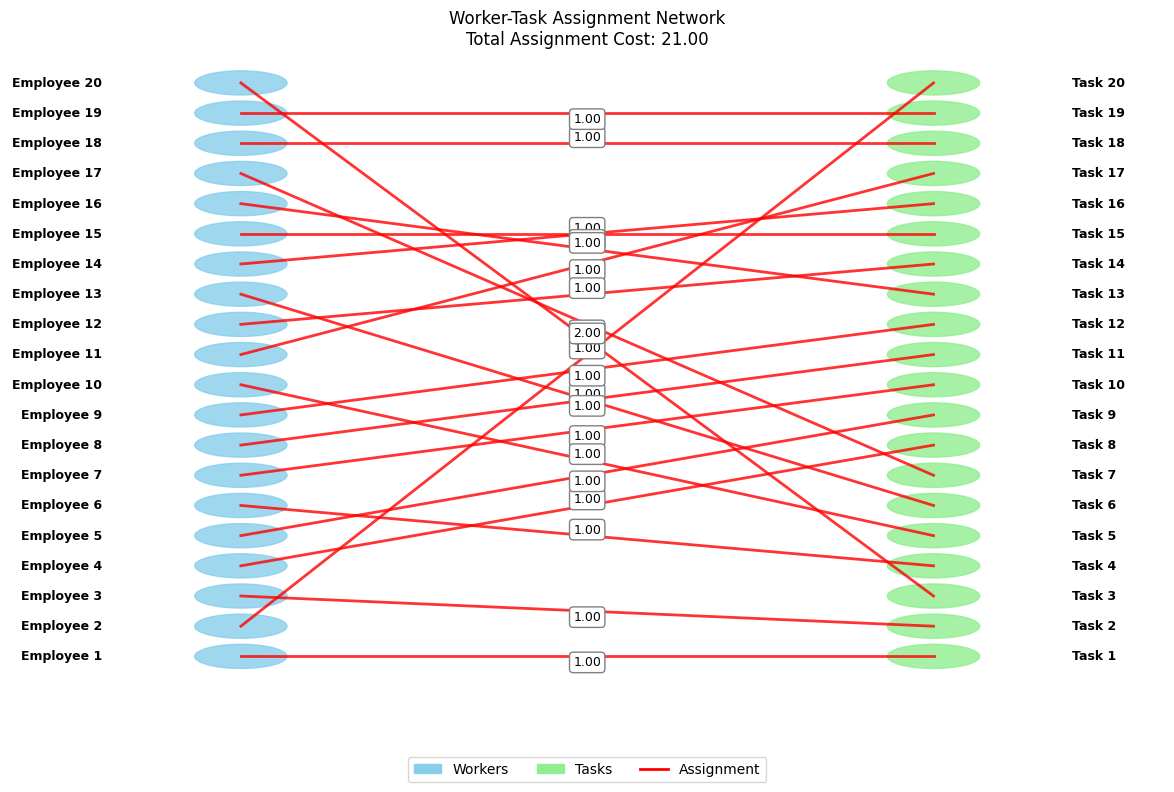

In [15]:
test_hungarian_assignment_from_excel("test_data.xlsx")

### Example Usage: Minimization (Square Matrix)

In [16]:
cost_matrix_min = np.array([
    [75, 75, 75],
    [35, 85, 35],
    [125, 90, 90]
])
assignments_min, cost_min, _, _ = solve_hungarian_assignment(cost_matrix_min)


Input Cost Matrix (3 workers x 3 tasks):
[[ 75  75  75]
 [ 35  85  35]
 [125  90  90]]

Optimal Assignments (Worker Index -> Task Index):
  Worker 0 -> Task 0 (Cost: 75)
  Worker 1 -> Task 2 (Cost: 35)
  Worker 2 -> Task 1 (Cost: 90)

Total Minimum Cost: 200


### Example Usage: Rectangular Matrix (More Workers than Tasks)

In [17]:
cost_matrix_rect = np.array([
    [76, 0],
    [0, 0],
    [76, 0]
])

assignments_rect, cost_rect, assigned_w, assigned_t = solve_hungarian_assignment(cost_matrix_rect)

Input Cost Matrix (3 workers x 2 tasks):
[[76  0]
 [ 0  0]
 [76  0]]

Optimal Assignments (Worker Index -> Task Index):
  Worker 0 -> Task 1 (Cost: 0)
  Worker 1 -> Task 0 (Cost: 0)

Total Minimum Cost: 0
Unassigned Workers: [2]


In [18]:
import numpy as np
import pandas as pd
from scipy.optimize import linear_sum_assignment

def load_matrices_from_excel(file_path):
    """
    Loads work_hours, cost, skill, and availability matrices from an Excel file.

    Args:
        file_path (str): Path to the Excel file.

    Returns:
        tuple: A tuple containing the work_hours, cost, skill, and availability matrices.
    """
    # Load the Excel file
    excel_data = pd.ExcelFile(file_path)

    # Load each matrix from separate sheets
    work_hours = excel_data.parse("WorkHours").values
    cost = excel_data.parse("Cost").values
    skill = excel_data.parse("Skill").values
    availability = excel_data.parse("Availability").values

    return work_hours, cost, skill, availability

def calculate_weighted_matrix(work_hours, cost, skill, availability, weights):
    """
    Calculates a weighted aggregate matrix based on custom scoring logic.

    Args:
        work_hours (np.ndarray): Matrix of work hours required for each worker-task pair.
        cost (np.ndarray): Matrix of costs for each worker-task pair.
        skill (np.ndarray): Matrix of skill levels for each worker-task pair.
        availability (np.ndarray): Matrix of availability (1 for available, 0 for unavailable).
        weights (dict): Weights for each parameter.

    Returns:
        np.ndarray: Weighted aggregate matrix.
    """
    # Initialize the weighted matrix
    weighted_matrix = np.zeros_like(work_hours, dtype=float)

    # Apply custom scoring logic
    for i in range(work_hours.shape[0]):  # Iterate over workers
        for j in range(work_hours.shape[1]):  # Iterate over tasks
            # Penalize unavailability heavily
            if availability[i, j] == 0:
                weighted_matrix[i, j] = float('inf')  # Unavailable workers cannot be assigned
                continue

            # Prioritize skill: Higher skill reduces cost
            skill_score = 1 / (skill[i, j] + 1e-6)  # Avoid division by zero

            # Calculate the weighted score
            score = (
                weights["work_hours"] * work_hours[i, j] +  # Higher work hours increase cost
                weights["cost"] * cost[i, j] +  # Higher cost increases cost
                weights["skill"] * skill_score  # Lower skill increases cost
            )
            weighted_matrix[i, j] = score

    return weighted_matrix

def prioritize_tasks_by_skill(skill_matrix):
    """
    Reorders tasks based on their complexity (higher skill requirements).

    Args:
        skill_matrix (np.ndarray): Matrix of skill levels for each worker-task pair.

    Returns:
        np.ndarray: Reordered skill matrix with tasks sorted by complexity.
    """
    # Calculate the average skill required for each task
    task_complexity = skill_matrix.mean(axis=0)

    # Sort tasks by descending complexity
    sorted_indices = np.argsort(-task_complexity)

    return sorted_indices

def optimize_task_assignment(weighted_matrix):
    """
    Optimally assigns tasks to employees using the Hungarian Assignment Method.

    Args:
        weighted_matrix (np.ndarray): Weighted aggregate matrix.

    Returns:
        tuple: Optimal assignments and total cost.
    """
    # Solve the assignment problem using the Hungarian method
    worker_indices, task_indices = linear_sum_assignment(weighted_matrix)
    total_cost = weighted_matrix[worker_indices, task_indices].sum()
    assignments = list(zip(worker_indices, task_indices))
    return assignments, total_cost


    # Path to the Excel file
    file_path = "employee_task_assignment.xlsx"

    # Load matrices from the Excel file
    try:
        work_hours, cost, skill, availability = load_matrices_from_excel(file_path)
    except Exception as e:
        print(f"Error loading Excel file: {e}")
        exit()

    # Define weights for the factors
    weights = {"work_hours": 0.3, "cost": 0.3, "skill": 0.4}

    # Reorder tasks by complexity (based on skill requirements)
    sorted_task_indices = prioritize_tasks_by_skill(skill)
    skill = skill[:, sorted_task_indices]
    work_hours = work_hours[:, sorted_task_indices]
    cost = cost[:, sorted_task_indices]
    availability = availability[:, sorted_task_indices]

    # Calculate the weighted aggregate matrix
    try:
        weighted_matrix = calculate_weighted_matrix(work_hours, cost, skill, availability, weights)
    except Exception as e:
        print(f"Error calculating weighted matrix: {e}")
        exit()

    # Optimize task assignment
    try:
        assignments, total_cost = optimize_task_assignment(weighted_matrix)
    except Exception as e:
        print(f"Error during optimization: {e}")
        exit()

    # Print the results
    print("Optimal Assignments:")
    for worker, task in assignments:
        print(f"Worker {worker + 1} -> Task {sorted_task_indices[task] + 1}")
    print(f"Total Cost: {total_cost}")

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns

class PerformanceTracker:
    def __init__(self):
        self.metrics_df = pd.DataFrame(columns=[
            'date', 'early_completion_hours', 'defects_count', 
            'extra_outputs', 'overtime_hours'
        ])
        
    def record_daily_metrics(self):
        """Record daily performance metrics"""
        date = datetime.now().strftime('%Y-%m-%d')
        
        try:
            # Get daily metrics from user input
            early_hours = float(input("Hours saved (early completion) today: "))
            defects = int(input("Number of defects today: "))
            extra_output = int(input("Additional outputs beyond target today: "))
            overtime = float(input("Overtime hours today: "))
            
            # Add to dataframe
            new_record = pd.DataFrame([{
                'date': date,
                'early_completion_hours': early_hours,
                'defects_count': defects,
                'extra_outputs': extra_output,
                'overtime_hours': overtime
            }])
            
            self.metrics_df = pd.concat([self.metrics_df, new_record], ignore_index=True)
            print("Daily metrics recorded successfully!")
            
        except ValueError as e:
            print(f"Error: Please enter valid numbers. {str(e)}")
    
    def save_to_excel(self, filename='performance_metrics.xlsx'):
        """Save metrics to Excel file"""
        self.metrics_df.to_excel(filename, index=False)
        print(f"Metrics saved to {filename}")
    
    def load_from_excel(self, filename='performance_metrics.xlsx'):
        """Load metrics from Excel file"""
        try:
            self.metrics_df = pd.read_excel(filename)
            print("Metrics loaded successfully!")
        except FileNotFoundError:
            print("No existing metrics file found. Starting fresh.")
    
    def visualize_trends(self):
        """Generate visualization of performance trends"""
        if len(self.metrics_df) < 2:
            print("Not enough data to show trends. Please record more daily metrics.")
            return
        
        # Create figure with subplots
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('Performance Metrics Over Time', fontsize=16)
        
        # 1. Overtime Reduction
        sns.lineplot(data=self.metrics_df, x='date', y='overtime_hours', ax=ax1)
        ax1.set_title('Overtime Hours Trend')
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
        
        # 2. Early Completion
        sns.lineplot(data=self.metrics_df, x='date', y='early_completion_hours', ax=ax2)
        ax2.set_title('Early Completion Hours Trend')
        ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
        
        # 3. Defects Reduction
        sns.lineplot(data=self.metrics_df, x='date', y='defects_count', ax=ax3)
        ax3.set_title('Daily Defects Trend')
        ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)
        
        # 4. Extra Outputs
        sns.lineplot(data=self.metrics_df, x='date', y='extra_outputs', ax=ax4)
        ax4.set_title('Additional Outputs Trend')
        ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45)
        
        plt.tight_layout()
        plt.show()
        
        # Calculate and display improvement metrics
        first_week = self.metrics_df.head(7)
        last_week = self.metrics_df.tail(7)
        
        print("\nPerformance Improvements:")
        print(f"Overtime Reduction: {(first_week['overtime_hours'].mean() - last_week['overtime_hours'].mean()):.2f} hours")
        print(f"Defects Reduction: {(first_week['defects_count'].mean() - last_week['defects_count'].mean()):.2f}%")
        print(f"Output Increase: {(last_week['extra_outputs'].mean() - first_week['extra_outputs'].mean()):.2f} units")

def main():
    tracker = PerformanceTracker()
    
    while True:
        print("\nPerformance Tracking Menu:")
        print("1. Record today's metrics")
        print("2. View performance trends")
        print("3. Save metrics to Excel")
        print("4. Load metrics from Excel")
        print("5. Exit")
        
        choice = input("\nEnter your choice (1-5): ")
        
        if choice == '1':
            tracker.record_daily_metrics()
        elif choice == '2':
            tracker.visualize_trends()
        elif choice == '3':
            tracker.save_to_excel()
        elif choice == '4':
            tracker.load_from_excel()
        elif choice == '5':
            print("Exiting program...")
            break
        else:
            print("Invalid choice. Please try again.")

